In [1]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_Vimalathithan_83ed67
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.525 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
NIJ_Train_Mod = pd.read_csv("NIJ_s_Recidivism_Challenge_Training_Dataset-sara.csv")

In [5]:
NIJ_Train_Mod_Full = h2o.H2OFrame(NIJ_Train_Mod)
print(NIJ_Train_Mod_Full.columns)

Parse progress: |█████████████████████████████████████████████████████████| 100%
['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Violatio

In [6]:
NIJ_Train_Mod_Full["Recidivism_Arrest_Year1"]=NIJ_Train_Mod_Full["Recidivism_Arrest_Year1"].asfactor()

In [7]:
NIJ_Train_Mod_Full.describe()

Rows:18028
Cols:53




,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
type,int,enum,enum,enum,int,enum,int,enum,enum,int,enum,enum,int,int,int,int,int,int,enum,enum,int,int,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,real,real,real,real,real,real,real,enum,enum,enum,enum,enum
mins,1.0,,,,1.0,,1.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,,0.0,0.0,,,,,,,,,,,,,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
mean,13386.065342800066,,,,12.307577102285345,,6.064753079444013,,,0.812723373838455,,,4.414911449602812,2.0828792191948,0.6597998822836924,1.4095408895265436,1.3619173262972737,1.452849664528497,,,0.8324328437714035,1.0695922948801495,,0.6161360601588282,0.3367316341829085,,,,,,,,,,,,,0.36162238136670893,1.926088059890879,0.1681324680050948,0.5673466841350056,93.5858598589524,0.06312002135558516,0.01417291604021951,0.012768276397193669,0.007681323101278122,0.48003490711381924,0.7664227222145314,,,,,
maxs,26761.0,,,,25.0,,10.0,,,2.0,,,9.0,5.0,2.0,4.0,4.0,4.0,,,2.0,3.0,,2.0,1.0,,,,,,,,,,,,,3.0,9.0,2.0,2.0,1087.0,1.0,1.0,1.0,1.0,1.0,8.0,,,,,
sigma,7721.45199210053,,,,7.143255483700004,,2.38281069293838,,,0.8167430677526971,,,2.411659438566055,1.6725748398001308,0.7428877504621911,1.3091293195913836,1.310739088997926,1.3851498561202278,,,0.7772946645801878,1.0662485610595156,,0.7502850718927523,0.4726099706580711,,,,,,,,,,,,,0.8430023110788698,2.763995913238437,0.4887386930153344,0.7305650615200647,117.56134050131506,0.13835671043544032,0.06347303019200744,0.05957188007257393,0.04222438425341263,0.42439649611104063,0.813473970173938,,,,,
zeros,0,,,,0,,0,,,5599,,,172,2853,7705,4561,5563,4718,,,5255,5507,,7784,8848,,,,,,,,,,,,,12248,9534,14531,9245,0,9893,13073,12975,13328,5713,5455,,,,,
missing,0,0,0,0,0,0,330,0,0,5437,0,0,4307,5733,2737,4088,2110,4465,0,0,4887,4219,0,3799,4688,0,0,0,0,0,0,0,0,0,0,0,0,3087,2266,1541,1999,4260,3632,3632,3632,3632,307,534,0,0,0,0,0
0,1.0,M,BLACK,43-47,16.0,False,3.0,Standard,At least some college,nan,Drug,More than 3 years,6.0,nan,1.0,3.0,3.0,4.0,False,False,nan,3.0,False,2.0,nan,False,False,False,False,False,True,True,False,False,False,False,False,0.0,6.0,0.0,2.0,612.0,0.0,0.0,0.0,0.0,0.488562092,0.447610294,False,False,False,False,False
1,2.0,M,BLACK,33-37,16.0,False,6.0,Specialized,Less than HS diploma,1.0,Violent/Non-Sex,More than 3 years,7.0,nan,nan,0.0,3.0,nan,True,False,nan,nan,True,0.0,nan,True,True,True,False,False,False,False,False,False,True,False,False,nan,0.0,0.0,2.0,35.66666667,0.0,0.0,0.0,0.0,0.425233645,2.0,False,True,False,False,True
2,3.0,M,BLACK,48 or older,24.0,False,7.0,High,At least some college,nan,Drug,1-2 years,6.0,nan,nan,2.0,2.0,nan,True,False,nan,2.0,True,1.0,nan,False,True,False,False,False,True,True,False,False,True,False,True,nan,6.0,0.0

In [8]:
y= "Recidivism_Arrest_Year1"
NIJ_Train_Mod_Full=NIJ_Train_Mod_Full.drop(["ID","Recidivism_Within_3years","Recidivism_Arrest_Year2","Recidivism_Arrest_Year3"],axis=1)
x= NIJ_Train_Mod_Full.columns
print(x)


['Gender', 'Race', 'Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Violations_ElectronicMonitoring', 'Violations_Instruction', 'Violations_FailToReport', 'Violati

In [9]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = NIJ_Train_Mod_Full)

AutoML progress: |█
07:51:19.827: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


In [10]:
lb = aml.leaderboard

In [11]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210531_075119,0.867429,0.405072,0.722504,0.218688,0.36581,0.133817
GBM_1_AutoML_20210531_075119,0.863819,0.410751,0.712971,0.21805,0.36834,0.135675
StackedEnsemble_BestOfFamily_AutoML_20210531_075119,0.86369,0.410467,0.71245,0.217817,0.368455,0.135759
GBM_5_AutoML_20210531_075119,0.863031,0.410909,0.714142,0.222919,0.368593,0.135861
GBM_grid__1_AutoML_20210531_075119_model_1,0.86279,0.413372,0.709886,0.222226,0.369349,0.136419
GBM_2_AutoML_20210531_075119,0.862121,0.412545,0.711536,0.225639,0.369206,0.136313
GBM_3_AutoML_20210531_075119,0.86191,0.412633,0.711859,0.223533,0.369558,0.136573
GBM_4_AutoML_20210531_075119,0.856164,0.421448,0.699796,0.229361,0.373604,0.13958
DRF_1_AutoML_20210531_075119,0.818156,0.4755,0.637941,0.259268,0.39537,0.156318
XRT_1_AutoML_20210531_075119,0.816627,0.474861,0.631946,0.258569,0.396611,0.1573


In [12]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210531_075119,0.867429,0.405072,0.722504,0.218688,0.36581,0.133817
GBM_1_AutoML_20210531_075119,0.863819,0.410751,0.712971,0.21805,0.36834,0.135675
StackedEnsemble_BestOfFamily_AutoML_20210531_075119,0.86369,0.410467,0.71245,0.217817,0.368455,0.135759
GBM_5_AutoML_20210531_075119,0.863031,0.410909,0.714142,0.222919,0.368593,0.135861
GBM_grid__1_AutoML_20210531_075119_model_1,0.86279,0.413372,0.709886,0.222226,0.369349,0.136419
GBM_2_AutoML_20210531_075119,0.862121,0.412545,0.711536,0.225639,0.369206,0.136313
GBM_3_AutoML_20210531_075119,0.86191,0.412633,0.711859,0.223533,0.369558,0.136573
GBM_4_AutoML_20210531_075119,0.856164,0.421448,0.699796,0.229361,0.373604,0.13958
DRF_1_AutoML_20210531_075119,0.818156,0.4755,0.637941,0.259268,0.39537,0.156318
XRT_1_AutoML_20210531_075119,0.816627,0.474861,0.631946,0.258569,0.396611,0.1573


In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [14]:
metalearner.coef_norm()

{'Intercept': -1.5496564831222084,
 'GBM_1_AutoML_20210531_075119': 0.4791762582895369,
 'GBM_5_AutoML_20210531_075119': 0.5444018409686141,
 'GBM_grid__1_AutoML_20210531_075119_model_1': 0.3101906619099289,
 'GBM_2_AutoML_20210531_075119': 0.2417140689593273,
 'GBM_3_AutoML_20210531_075119': 0.45583713046984486,
 'GBM_4_AutoML_20210531_075119': 0.06034087401233019,
 'DRF_1_AutoML_20210531_075119': 0.0,
 'XRT_1_AutoML_20210531_075119': 0.0,
 'GLM_1_AutoML_20210531_075119': 0.0,
 'DeepLearning_1_AutoML_20210531_075119': 0.0}

In [15]:
se.confusion_matrix

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210531_075119

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08797613566372886
RMSE: 0.2966077134258798
LogLoss: 0.29105461624243056
Null degrees of freedom: 10050
Residual degrees of freedom: 10044
Null deviance: 12311.73937063131
Residual deviance: 5850.77989570534
AIC: 5864.77989570534
AUC: 0.9515930048026316
AUCPR: 0.8982699033508889
Gini: 0.9031860096052633

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4302824488110038: 


,,False,True,Error,Rate
0,False,6338.0,679.0,0.0968,(679.0/7017.0)
1,True,475.0,2559.0,0.1566,(475.0/3034.0)
2,Total,6813.0,3238.0,0.1148,(1154.0/10051.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.430282,0.816008,192.0
1,max f2,0.276527,0.869064,251.0
2,max f0point5,0.553743,0.837080,144.0
3,max accuracy,0.481559,0.886379,173.0
4,max precision,0.974181,1.000000,0.0
5,max recall,0.037981,1.000000,367.0
6,max specificity,0.974181,1.000000,0.0
7,max absolute_mcc,0.430282,0.733513,192.0
8,max min_per_class_accuracy,0.387988,0.877868,207.0
9,max mean_per_class_accuracy,0.383362,0.879241,209.0



Gains/Lift Table: Avg response rate: 30.19 %, avg score: 30.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010049,0.926142,3.312788,3.312788,1.000000,0.943750,1.000000,0.943750,0.033289,0.033289,231.278840,231.278840,0.033289
1,2,0.020098,0.902219,3.279989,3.296388,0.990099,0.913435,0.995050,0.928593,0.032960,0.066249,227.998851,229.638846,0.066107
2,3,0.030047,0.882162,3.246533,3.279880,0.980000,0.892320,0.990066,0.916582,0.032301,0.098550,224.653263,227.987990,0.098122
3,4,0.040096,0.864775,3.279989,3.279907,0.990099,0.874587,0.990074,0.906057,0.032960,0.131510,227.998851,227.990712,0.130940
4,5,0.050045,0.847571,3.246533,3.273272,0.980000,0.855976,0.988072,0.896101,0.032301,0.163810,224.653263,227.327204,0.162955
5,6,0.100090,0.771225,3.181067,3.227170,0.960239,0.807654,0.974155,0.851877,0.159196,0.323006,218.106719,222.716961,0.319301
6,7,0.150035,0.699943,2.989429,3.148028,0.902390,0.736196,0.950265,0.813368,0.149308,0.472314,198.942857,214.802770,0.461625
7,8,0.200080,0.622678,2.687113,3.032742,0.811133,0.661125,0.915465,0.775288,0.134476,0.606790,168.711266,203.274164,0.582563
8,9,0.300070,0.464692,2.004155,2.689993,0.604975,0.544198,0.812003,0.698284,0.200396,0.807185,100.415457,168.999297,0.726381
9,10,0.400060,0.317557,1.137226,2.301898,0.343284,0.388690,0.694852,0.620905,0.113711,0.920897,13.722587,130.189773,0.746035




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13381720734600047
RMSE: 0.3658103434103531
LogLoss: 0.4050717126315097
Null degrees of freedom: 18027
Residual degrees of freedom: 18021
Null deviance: 21973.61593555157
Residual deviance: 14605.265670641711
AIC: 14619.265670641711
AUC: 0.8674286076676544
AUCPR: 0.7225042941628982
Gini: 0.7348572153353088

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3377251597766589: 


,,False,True,Error,Rate
0,False,9807.0,2844.0,0.2248,(2844.0/12651.0)
1,True,1143.0,4234.0,0.2126,(1143.0/5377.0)
2,Total,10950.0,7078.0,0.2212,(3987.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.337725,0.679888,228.0
1,max f2,0.132925,0.791813,316.0
2,max f0point5,0.525035,0.670761,157.0
3,max accuracy,0.441898,0.799756,187.0
4,max precision,0.973791,1.000000,0.0
5,max recall,0.012138,1.000000,389.0
6,max specificity,0.973791,1.000000,0.0
7,max absolute_mcc,0.386202,0.529971,209.0
8,max min_per_class_accuracy,0.343187,0.779148,226.0
9,max mean_per_class_accuracy,0.300887,0.783031,244.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.914219,3.130514,3.130514,0.933702,0.935570,0.933702,0.935570,0.031430,0.031430,213.051394,213.051394,0.030482
1,2,0.020024,0.886245,3.073399,3.102036,0.916667,0.898408,0.925208,0.917041,0.030686,0.062116,207.339905,210.203560,0.059982
2,3,0.030009,0.863920,2.998892,3.067718,0.894444,0.875417,0.914972,0.903192,0.029942,0.092059,199.889240,206.771809,0.088423
3,4,0.040049,0.842150,2.889705,3.023092,0.861878,0.852007,0.901662,0.890360,0.029012,0.121071,188.970518,202.309158,0.115459
4,5,0.050033,0.822079,2.775372,2.973658,0.827778,0.830701,0.886918,0.878455,0.027711,0.148782,177.537247,197.365761,0.140719
5,6,0.100011,0.734881,2.571347,2.772614,0.766926,0.777097,0.826955,0.827804,0.128510,0.277292,157.134748,177.261411,0.252630
6,7,0.150044,0.661094,2.312019,2.619026,0.689579,0.696277,0.781146,0.783946,0.115678,0.392970,131.201879,161.902558,0.346175
7,8,0.200022,0.586512,1.946186,2.450909,0.580466,0.624078,0.731004,0.744001,0.097266,0.490236,94.618630,145.090906,0.413562
8,9,0.300033,0.449108,1.746133,2.215984,0.520799,0.517122,0.660935,0.668375,0.174633,0.664869,74.613323,121.598378,0.519900
9,10,0.399989,0.327418,1.298698,1.986758,0.387347,0.386475,0.592567,0.597929,0.129812,0.794681,29.869793,98.675772,0.562446


<bound method H2OBinomialModel.confusion_matrix of >

In [16]:
se.accuracy

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210531_075119

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08797613566372886
RMSE: 0.2966077134258798
LogLoss: 0.29105461624243056
Null degrees of freedom: 10050
Residual degrees of freedom: 10044
Null deviance: 12311.73937063131
Residual deviance: 5850.77989570534
AIC: 5864.77989570534
AUC: 0.9515930048026316
AUCPR: 0.8982699033508889
Gini: 0.9031860096052633

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4302824488110038: 


,,False,True,Error,Rate
0,False,6338.0,679.0,0.0968,(679.0/7017.0)
1,True,475.0,2559.0,0.1566,(475.0/3034.0)
2,Total,6813.0,3238.0,0.1148,(1154.0/10051.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.430282,0.816008,192.0
1,max f2,0.276527,0.869064,251.0
2,max f0point5,0.553743,0.837080,144.0
3,max accuracy,0.481559,0.886379,173.0
4,max precision,0.974181,1.000000,0.0
5,max recall,0.037981,1.000000,367.0
6,max specificity,0.974181,1.000000,0.0
7,max absolute_mcc,0.430282,0.733513,192.0
8,max min_per_class_accuracy,0.387988,0.877868,207.0
9,max mean_per_class_accuracy,0.383362,0.879241,209.0



Gains/Lift Table: Avg response rate: 30.19 %, avg score: 30.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010049,0.926142,3.312788,3.312788,1.000000,0.943750,1.000000,0.943750,0.033289,0.033289,231.278840,231.278840,0.033289
1,2,0.020098,0.902219,3.279989,3.296388,0.990099,0.913435,0.995050,0.928593,0.032960,0.066249,227.998851,229.638846,0.066107
2,3,0.030047,0.882162,3.246533,3.279880,0.980000,0.892320,0.990066,0.916582,0.032301,0.098550,224.653263,227.987990,0.098122
3,4,0.040096,0.864775,3.279989,3.279907,0.990099,0.874587,0.990074,0.906057,0.032960,0.131510,227.998851,227.990712,0.130940
4,5,0.050045,0.847571,3.246533,3.273272,0.980000,0.855976,0.988072,0.896101,0.032301,0.163810,224.653263,227.327204,0.162955
5,6,0.100090,0.771225,3.181067,3.227170,0.960239,0.807654,0.974155,0.851877,0.159196,0.323006,218.106719,222.716961,0.319301
6,7,0.150035,0.699943,2.989429,3.148028,0.902390,0.736196,0.950265,0.813368,0.149308,0.472314,198.942857,214.802770,0.461625
7,8,0.200080,0.622678,2.687113,3.032742,0.811133,0.661125,0.915465,0.775288,0.134476,0.606790,168.711266,203.274164,0.582563
8,9,0.300070,0.464692,2.004155,2.689993,0.604975,0.544198,0.812003,0.698284,0.200396,0.807185,100.415457,168.999297,0.726381
9,10,0.400060,0.317557,1.137226,2.301898,0.343284,0.388690,0.694852,0.620905,0.113711,0.920897,13.722587,130.189773,0.746035




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13381720734600047
RMSE: 0.3658103434103531
LogLoss: 0.4050717126315097
Null degrees of freedom: 18027
Residual degrees of freedom: 18021
Null deviance: 21973.61593555157
Residual deviance: 14605.265670641711
AIC: 14619.265670641711
AUC: 0.8674286076676544
AUCPR: 0.7225042941628982
Gini: 0.7348572153353088

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3377251597766589: 


,,False,True,Error,Rate
0,False,9807.0,2844.0,0.2248,(2844.0/12651.0)
1,True,1143.0,4234.0,0.2126,(1143.0/5377.0)
2,Total,10950.0,7078.0,0.2212,(3987.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.337725,0.679888,228.0
1,max f2,0.132925,0.791813,316.0
2,max f0point5,0.525035,0.670761,157.0
3,max accuracy,0.441898,0.799756,187.0
4,max precision,0.973791,1.000000,0.0
5,max recall,0.012138,1.000000,389.0
6,max specificity,0.973791,1.000000,0.0
7,max absolute_mcc,0.386202,0.529971,209.0
8,max min_per_class_accuracy,0.343187,0.779148,226.0
9,max mean_per_class_accuracy,0.300887,0.783031,244.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.914219,3.130514,3.130514,0.933702,0.935570,0.933702,0.935570,0.031430,0.031430,213.051394,213.051394,0.030482
1,2,0.020024,0.886245,3.073399,3.102036,0.916667,0.898408,0.925208,0.917041,0.030686,0.062116,207.339905,210.203560,0.059982
2,3,0.030009,0.863920,2.998892,3.067718,0.894444,0.875417,0.914972,0.903192,0.029942,0.092059,199.889240,206.771809,0.088423
3,4,0.040049,0.842150,2.889705,3.023092,0.861878,0.852007,0.901662,0.890360,0.029012,0.121071,188.970518,202.309158,0.115459
4,5,0.050033,0.822079,2.775372,2.973658,0.827778,0.830701,0.886918,0.878455,0.027711,0.148782,177.537247,197.365761,0.140719
5,6,0.100011,0.734881,2.571347,2.772614,0.766926,0.777097,0.826955,0.827804,0.128510,0.277292,157.134748,177.261411,0.252630
6,7,0.150044,0.661094,2.312019,2.619026,0.689579,0.696277,0.781146,0.783946,0.115678,0.392970,131.201879,161.902558,0.346175
7,8,0.200022,0.586512,1.946186,2.450909,0.580466,0.624078,0.731004,0.744001,0.097266,0.490236,94.618630,145.090906,0.413562
8,9,0.300033,0.449108,1.746133,2.215984,0.520799,0.517122,0.660935,0.668375,0.174633,0.664869,74.613323,121.598378,0.519900
9,10,0.399989,0.327418,1.298698,1.986758,0.387347,0.386475,0.592567,0.597929,0.129812,0.794681,29.869793,98.675772,0.562446


<bound method H2OBinomialModel.accuracy of >

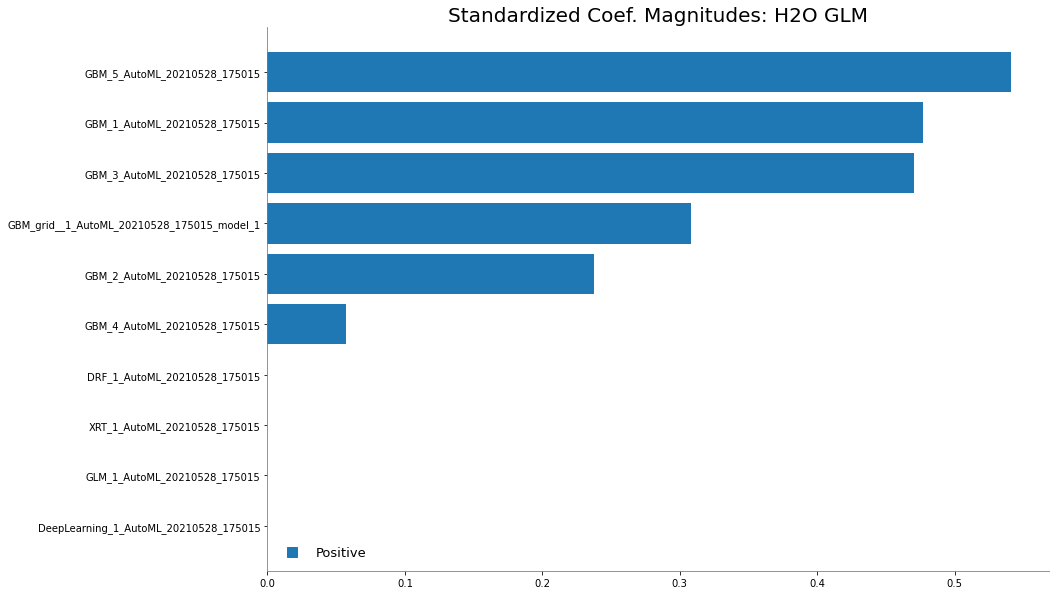

In [89]:
%matplotlib inline
metalearner.std_coef_plot()

In [17]:
gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20210531_075119


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,81.0,81.0,59912.0,6.0,6.0,6.0,25.0,64.0,55.444443




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10019259574566626
RMSE: 0.31653214014640957
LogLoss: 0.3228059692415566
Mean Per-Class Error: 0.14564385819817338
AUC: 0.9337223009610945
AUCPR: 0.859842657542678
Gini: 0.8674446019221891

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42566191297500694: 


,,False,True,Error,Rate
0,False,11245.0,1406.0,0.1111,(1406.0/12651.0)
1,True,1061.0,4316.0,0.1973,(1061.0/5377.0)
2,Total,12306.0,5722.0,0.1368,(2467.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.425662,0.777728,190.0
1,max f2,0.250152,0.844969,262.0
2,max f0point5,0.563751,0.797077,135.0
3,max accuracy,0.476581,0.865432,170.0
4,max precision,0.966792,1.000000,0.0
5,max recall,0.027485,1.000000,378.0
6,max specificity,0.966792,1.000000,0.0
7,max absolute_mcc,0.425662,0.679701,190.0
8,max min_per_class_accuracy,0.371936,0.851404,210.0
9,max mean_per_class_accuracy,0.348051,0.854356,220.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.902901,3.315751,3.315751,0.988950,0.927211,0.988950,0.927211,0.033290,0.033290,231.575146,231.575146,0.033132
1,2,0.020024,0.873064,3.334172,3.324936,0.994444,0.886822,0.991690,0.907072,0.033290,0.066580,233.417230,232.493636,0.066343
2,3,0.030009,0.849924,3.278292,3.309417,0.977778,0.860250,0.987061,0.891494,0.032732,0.099312,227.829232,230.941709,0.098759
3,4,0.040049,0.830813,3.241656,3.292430,0.966851,0.840142,0.981994,0.878620,0.032546,0.131858,224.165645,229.243000,0.130830
4,5,0.050033,0.812451,3.203786,3.274740,0.955556,0.821252,0.976718,0.867172,0.031988,0.163846,220.378567,227.474045,0.162186
5,6,0.100011,0.727436,3.110921,3.192876,0.927858,0.768991,0.952302,0.818109,0.155477,0.319323,211.092112,219.287621,0.312525
6,7,0.150044,0.656777,2.847277,3.077634,0.849224,0.692725,0.917930,0.776299,0.142459,0.461782,184.727716,207.763394,0.444234
7,8,0.200022,0.584848,2.448548,2.920450,0.730300,0.621733,0.871048,0.737679,0.122373,0.584155,144.854796,192.044968,0.547399
8,9,0.300033,0.450214,1.915354,2.585418,0.571270,0.517647,0.771122,0.664335,0.191557,0.775711,91.535381,158.541772,0.677853
9,10,0.399989,0.319781,1.177759,2.233649,0.351276,0.381667,0.666204,0.593697,0.117724,0.893435,17.775901,123.364945,0.703173




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.13567459317160033
RMSE: 0.36834032248940696
LogLoss: 0.41075078167522805
Mean Per-Class Error: 0.21804959856552708
AUC: 0.8638187499910877
AUCPR: 0.7129709674022839
Gini: 0.7276374999821753

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3088357379595852: 


,,False,True,Error,Rate
0,False,9522.0,3129.0,0.2473,(3129.0/12651.0)
1,True,1015.0,4362.0,0.1888,(1015.0/5377.0)
2,Total,10537.0,7491.0,0.2299,(4144.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.308836,0.677961,239.0
1,max f2,0.142659,0.790806,313.0
2,max f0point5,0.508395,0.664902,156.0
3,max accuracy,0.481924,0.797260,167.0
4,max precision,0.970857,1.000000,0.0
5,max recall,0.014768,1.000000,389.0
6,max specificity,0.970857,1.000000,0.0
7,max absolute_mcc,0.380993,0.523499,208.0
8,max min_per_class_accuracy,0.338251,0.777409,226.0
9,max mean_per_class_accuracy,0.308836,0.781950,239.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.898144,3.130514,3.130514,0.933702,0.923453,0.933702,0.923453,0.031430,0.031430,213.051394,213.051394,0.030482
1,2,0.020024,0.860632,3.054772,3.092748,0.911111,0.878824,0.922438,0.901200,0.030500,0.061930,205.477238,209.274807,0.059717
2,3,0.030009,0.835631,2.849879,3.011941,0.850000,0.847070,0.898336,0.883190,0.028455,0.090385,184.987911,201.194139,0.086037
3,4,0.040049,0.812612,2.760039,2.948791,0.823204,0.824023,0.879501,0.868357,0.027711,0.118096,176.003892,194.879133,0.111219
4,5,0.050033,0.794569,2.849879,2.929053,0.850000,0.803656,0.873614,0.855446,0.028455,0.146550,184.987911,192.905275,0.137539
5,6,0.100011,0.705960,2.508087,2.718687,0.748058,0.747603,0.810871,0.801554,0.125349,0.271899,150.808712,171.868668,0.244944
6,7,0.150044,0.631937,2.312019,2.583081,0.689579,0.668295,0.770425,0.757118,0.115678,0.387577,131.201879,158.308060,0.338490
7,8,0.200022,0.564049,1.935023,2.421156,0.577137,0.598543,0.722130,0.717496,0.096708,0.484285,93.502271,142.115599,0.405082
8,9,0.300033,0.440487,1.740555,2.194289,0.519135,0.500483,0.654465,0.645159,0.174075,0.658360,74.055453,119.428884,0.510624
9,10,0.399989,0.324544,1.337771,1.980248,0.399001,0.380981,0.590625,0.579142,0.133718,0.792077,33.777051,98.024834,0.558736




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7837257,0.0117617445,0.7933999,0.7684415,0.78230727,0.7972261,0.7772538
1,auc,0.86389035,0.0048539233,0.8649034,0.8556991,0.8675965,0.86740917,0.8638437
2,err,0.21627429,0.0117617445,0.20660011,0.23155852,0.21769273,0.20277393,0.22274618
3,err_count,779.8,42.440548,745.0,835.0,785.0,731.0,803.0
4,f0point5,0.63599044,0.015952792,0.647857,0.6194172,0.6362189,0.65544,0.6210191
5,f1,0.6809015,0.00810247,0.67762876,0.66956866,0.69130945,0.6847779,0.68122274
6,f2,0.7333775,0.021334141,0.7102685,0.7285567,0.7568452,0.7168653,0.75435203
7,lift_top_group,3.1358035,0.1109866,3.1055498,3.2100096,2.9560313,3.1781316,3.2292945
8,logloss,0.41075045,0.005978554,0.408412,0.42134482,0.40869018,0.40669727,0.40860793
9,max_per_class_error,0.24525394,0.016711961,0.26616684,0.2339833,0.22875299,0.26001865,0.23734798



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-31 07:52:12,9.724 sec,0.0,0.457493,0.609381,0.500000,0.298258,1.000000,0.701742
1,,2021-05-31 07:52:13,9.924 sec,5.0,0.416518,0.523993,0.855942,0.699389,3.204609,0.237630
2,,2021-05-31 07:52:13,10.062 sec,10.0,0.393193,0.476615,0.871913,0.725902,3.204609,0.218826
3,,2021-05-31 07:52:13,10.178 sec,15.0,0.376313,0.441558,0.883008,0.752102,3.278704,0.199634
4,,2021-05-31 07:52:13,10.278 sec,20.0,0.366365,0.420279,0.889602,0.765890,3.315751,0.206457
5,,2021-05-31 07:52:13,10.379 sec,25.0,0.358712,0.403668,0.894937,0.776549,3.315751,0.191147
6,,2021-05-31 07:52:13,10.495 sec,30.0,0.352717,0.391131,0.900205,0.787701,3.260180,0.184879
7,,2021-05-31 07:52:13,10.595 sec,35.0,0.347433,0.380658,0.905053,0.797776,3.297228,0.173009
8,,2021-05-31 07:52:13,10.695 sec,40.0,0.342755,0.371323,0.909845,0.808765,3.334275,0.170291
9,,2021-05-31 07:52:13,10.811 sec,45.0,0.338409,0.362472,0.913734,0.816763,3.315751,0.168793



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Percent_Days_Employed,2197.381348,1.000000,0.238033
1,Jobs_Per_Year,1639.730469,0.746220,0.177625
2,Delinquency_Reports,564.791931,0.257030,0.061181
3,Avg_Days_per_DrugTest,433.241211,0.197163,0.046931
4,Age_at_Release,414.811951,0.188776,0.044935
5,DrugTests_THC_Positive,368.832581,0.167851,0.039954
6,Residence_Changes,333.255005,0.151660,0.036100
7,Prior_Arrest_Episodes_Felony,287.215363,0.130708,0.031113
8,Program_Attendances,268.366150,0.122130,0.029071
9,Gang_Affiliated,235.279907,0.107073,0.025487



See the whole table with table.as_data_frame()



In [18]:
NIJ_Test_Mod = h2o.import_file("NIJ_s_Recidivism_Challenge_Test_Dataset1-sara.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [19]:
NIJ_Test_Mod.describe()

Rows:7807
Cols:33




,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other
type,int,enum,enum,enum,int,enum,int,enum,enum,int,enum,enum,int,int,int,int,int,int,enum,enum,int,int,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum
mins,6.0,,,,1.0,,1.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,,0.0,0.0,,,,,,,,
mean,13147.602023824773,,,,12.48699884718842,,6.1225528582615505,,,0.8110582204320762,,,4.460160696350853,2.083614548181478,0.664463802943827,1.4269331585845346,1.3597837205903849,1.487825356842989,,,0.8320836965998256,1.1035737921906021,,0.6062226543509966,0.3482127288578902,,,,,,,,
maxs,26755.0,,,,25.0,,10.0,,,2.0,,,9.0,5.0,2.0,4.0,4.0,4.0,,,2.0,3.0,,2.0,1.0,,,,,,,,
sigma,7721.873304986551,,,,7.110601208719824,,2.377941170789086,,,0.817431863459127,,,2.413548531783437,1.6658124644167591,0.7459682969010476,1.3176110953709808,1.3216991712175232,1.3757989915053217,,,0.7749226814076573,1.0695770981890422,,0.7468053029174522,0.47644538603299535,,,,,,,,
zeros,0,,,,0,,0,,,2438,,,61,1246,3344,1956,2439,1981,,,2284,2312,,3414,3738,,,,,,,,
missing,0,0,0,0,0,950,145,508,0,2345,956,0,1833,2473,1149,1703,964,1852,0,0,2072,1763,0,1636,2072,0,0,0,0,0,0,0,0
0,6.0,M,WHITE,38-42,17.0,false,5.0,Standard,High School Diploma,0.0,Property,More than 3 years,4.0,0.0,1.0,3.0,0.0,0.0,false,false,1.0,0.0,false,2.0,0.0,false,false,false,false,false,false,false,true
1,8.0,M,BLACK,38-42,16.0,false,5.0,High,High School Diploma,nan,Drug,Greater than 2 to 3 years,6.0,nan,nan,1.0,2.0,nan,false,false,1.0,nan,true,0.0,nan,true,false,false,false,false,false,true,false
2,12.0,M,BLACK,33-37,16.0,false,5.0,Specialized,High School Diploma,nan,Other,1-2 years,nan,1.0,1.0,1.0,2.0,3.0,false,false,nan,1.0,false,0.0,nan,false,false,false,false,true,true,true,true


In [20]:
NIJ_Test_Mod.columns

['ID',
 'Gender',
 'Race',
 'Age_at_Release',
 'Residence_PUMA',
 'Gang_Affiliated',
 'Supervision_Risk_Score_First',
 'Supervision_Level_First',
 'Education_Level',
 'Dependents',
 'Prison_Offense',
 'Prison_Years',
 'Prior_Arrest_Episodes_Felony',
 'Prior_Arrest_Episodes_Misd',
 'Prior_Arrest_Episodes_Violent',
 'Prior_Arrest_Episodes_Property',
 'Prior_Arrest_Episodes_Drug',
 'Prior_Arrest_Episodes_PPViolationCharges',
 'Prior_Arrest_Episodes_DVCharges',
 'Prior_Arrest_Episodes_GunCharges',
 'Prior_Conviction_Episodes_Felony',
 'Prior_Conviction_Episodes_Misd',
 'Prior_Conviction_Episodes_Viol',
 'Prior_Conviction_Episodes_Prop',
 'Prior_Conviction_Episodes_Drug',
 'Prior_Conviction_Episodes_PPViolationCharges',
 'Prior_Conviction_Episodes_DomesticViolenceCharges',
 'Prior_Conviction_Episodes_GunCharges',
 'Prior_Revocations_Parole',
 'Prior_Revocations_Probation',
 'Condition_MH_SA',
 'Condition_Cog_Ed',
 'Condition_Other']

In [21]:
NIJ_Test_Mod.ncols

33

In [23]:
NIJ_Test_Mod=NIJ_Test_Mod.drop(["ID"],axis=1)

H2OValueError: Column(s) selected to drop are not in original frame: ['ID']

In [24]:
NIJ_Test_Mod.columns

['Gender',
 'Race',
 'Age_at_Release',
 'Residence_PUMA',
 'Gang_Affiliated',
 'Supervision_Risk_Score_First',
 'Supervision_Level_First',
 'Education_Level',
 'Dependents',
 'Prison_Offense',
 'Prison_Years',
 'Prior_Arrest_Episodes_Felony',
 'Prior_Arrest_Episodes_Misd',
 'Prior_Arrest_Episodes_Violent',
 'Prior_Arrest_Episodes_Property',
 'Prior_Arrest_Episodes_Drug',
 'Prior_Arrest_Episodes_PPViolationCharges',
 'Prior_Arrest_Episodes_DVCharges',
 'Prior_Arrest_Episodes_GunCharges',
 'Prior_Conviction_Episodes_Felony',
 'Prior_Conviction_Episodes_Misd',
 'Prior_Conviction_Episodes_Viol',
 'Prior_Conviction_Episodes_Prop',
 'Prior_Conviction_Episodes_Drug',
 'Prior_Conviction_Episodes_PPViolationCharges',
 'Prior_Conviction_Episodes_DomesticViolenceCharges',
 'Prior_Conviction_Episodes_GunCharges',
 'Prior_Revocations_Parole',
 'Prior_Revocations_Probation',
 'Condition_MH_SA',
 'Condition_Cog_Ed',
 'Condition_Other']

In [25]:
NIJ_Train_Mod_Lim = NIJ_Train_Mod[NIJ_Train_Mod.columns[0:-20]]
# print(NIJ_Train_Mod_Lim.head())
NIJ_y_train_Lim = NIJ_Train_Mod[NIJ_Train_Mod.columns[-3]]
# print(NIJ_y_train_Lim.head())

x_train_NIJ = h2o.H2OFrame(pd.concat([NIJ_Train_Mod_Lim,NIJ_y_train_Lim],axis=1))
print(x_train_NIJ.columns)
print(x_train_NIJ.ncols)
# y_train.head(5)

Parse progress: |█████████████████████████████████████████████████████████| 100%
['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Recidivi

In [26]:
y_lim= "Recidivism_Arrest_Year1"
x_train_NIJ=x_train_NIJ.drop(["ID"],axis=1)
x_lim= x_train_NIJ.columns
print(x_lim)

['Gender', 'Race', 'Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Recidivism_Arrest_Year1']


In [27]:
aml_lim = H2OAutoML(max_models = 10, seed = 1)
aml_lim.train(x = x_lim, y = y_lim, training_frame = x_train_NIJ)

AutoML progress: |█
07:58:49.891: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


In [28]:
lb_lim= aml_lim.leaderboard

In [29]:
lb_lim.head(rows=lb_lim.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210531_075849,0.702407,0.553979,0.47996,0.356539,0.432896,0.187399
StackedEnsemble_BestOfFamily_AutoML_20210531_075849,0.701886,0.554332,0.480342,0.355547,0.432969,0.187462
GBM_grid__1_AutoML_20210531_075849_model_1,0.701719,0.554617,0.480573,0.352487,0.433044,0.187527
GBM_1_AutoML_20210531_075849,0.697198,0.557037,0.470178,0.358984,0.434409,0.188711
GBM_5_AutoML_20210531_075849,0.695324,0.557721,0.470921,0.361927,0.434739,0.188998
GBM_2_AutoML_20210531_075849,0.693545,0.559726,0.461424,0.359735,0.435787,0.18991
GBM_3_AutoML_20210531_075849,0.690449,0.561736,0.463679,0.36051,0.43647,0.190506
GLM_1_AutoML_20210531_075849,0.681036,0.564955,0.455544,0.376423,0.437913,0.191767
GBM_4_AutoML_20210531_075849,0.680667,0.568893,0.45425,0.374364,0.439662,0.193303
DRF_1_AutoML_20210531_075849,0.678007,0.569444,0.446666,0.379753,0.439021,0.192739


In [30]:
# Get model ids for all models in the AutoML Leaderboard
model_ids_lim = list(aml_lim.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se_lim = h2o.get_model([mid for mid in model_ids_lim if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner_lim = se_lim.metalearner()

In [31]:
metalearner_lim.coef_norm()

{'Intercept': -0.984666516886417,
 'GBM_grid__1_AutoML_20210531_075849_model_1': 0.3841967245011122,
 'GBM_1_AutoML_20210531_075849': 0.12373939955019803,
 'GBM_5_AutoML_20210531_075849': 0.11860128530090303,
 'GBM_2_AutoML_20210531_075849': 0.03006182752910259,
 'GBM_3_AutoML_20210531_075849': 0.04450615984491226,
 'GLM_1_AutoML_20210531_075849': 0.10474133502886954,
 'GBM_4_AutoML_20210531_075849': 0.013731906405278322,
 'DRF_1_AutoML_20210531_075849': 0.027134365832594425,
 'XRT_1_AutoML_20210531_075849': 0.006885993288546463,
 'DeepLearning_1_AutoML_20210531_075849': 0.00028218313318751855}

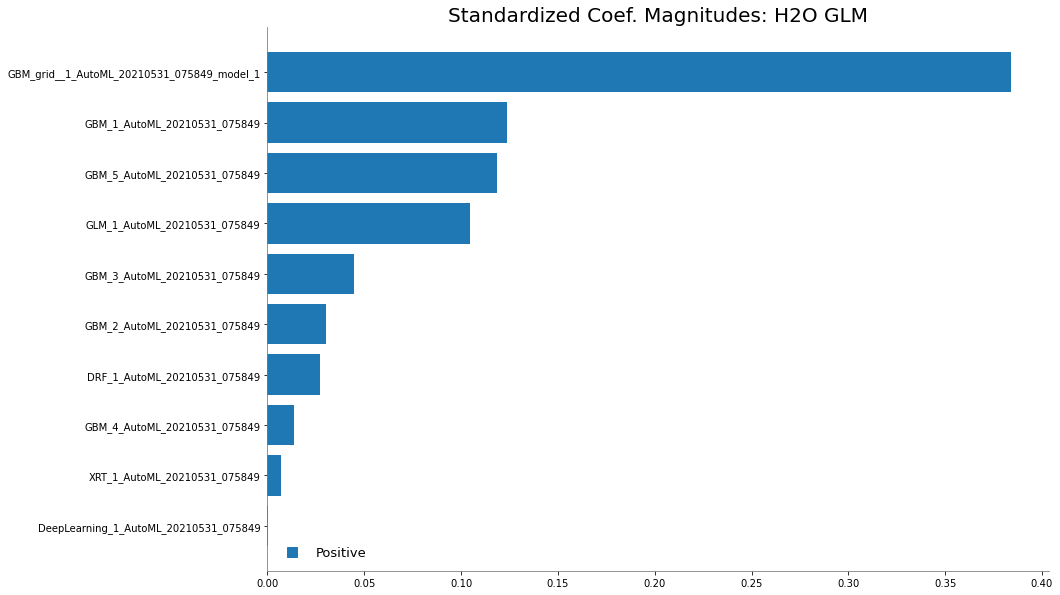

In [32]:
%matplotlib inline
metalearner_lim.std_coef_plot()

In [33]:
se_lim.accuracy

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210531_075849

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.16599992672772793
RMSE: 0.40743088582939796
LogLoss: 0.5012419572079362
Null degrees of freedom: 10050
Residual degrees of freedom: 10040
Null deviance: 12311.739370632284
Residual deviance: 10075.965823793933
AIC: 10097.965823793933
AUC: 0.7982632863836004
AUCPR: 0.6364111368096138
Gini: 0.5965265727672009

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32277840333743085: 


,,False,True,Error,Rate
0,False,5035.0,1982.0,0.2825,(1982.0/7017.0)
1,True,809.0,2225.0,0.2666,(809.0/3034.0)
2,Total,5844.0,4207.0,0.2777,(2791.0/10051.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.322778,0.614556,203.0
1,max f2,0.218948,0.738615,281.0
2,max f0point5,0.429882,0.597893,126.0
3,max accuracy,0.435698,0.761417,123.0
4,max precision,0.810522,1.000000,0.0
5,max recall,0.053661,1.000000,387.0
6,max specificity,0.810522,1.000000,0.0
7,max absolute_mcc,0.325732,0.419778,201.0
8,max min_per_class_accuracy,0.325732,0.723671,201.0
9,max mean_per_class_accuracy,0.322778,0.725449,203.0



Gains/Lift Table: Avg response rate: 30.19 %, avg score: 29.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010049,0.672434,3.115989,3.115989,0.940594,0.720141,0.940594,0.720141,0.031312,0.031312,211.598909,211.598909,0.030457
1,2,0.020098,0.628550,2.853590,2.984790,0.861386,0.650404,0.900990,0.685272,0.028675,0.059987,185.359001,198.478955,0.057137
2,3,0.030047,0.605233,2.848998,2.939825,0.860000,0.615855,0.887417,0.662287,0.028345,0.088332,184.899802,193.982547,0.083487
3,4,0.040096,0.584372,2.623991,2.860671,0.792079,0.595263,0.863524,0.645489,0.026368,0.114700,162.399081,186.067087,0.106862
4,5,0.050045,0.563311,2.285824,2.746387,0.690000,0.573408,0.829026,0.631159,0.022742,0.137442,128.582399,174.638720,0.125186
5,6,0.100090,0.507822,2.291949,2.519168,0.691849,0.532490,0.760437,0.581824,0.114700,0.252142,129.194903,151.916812,0.217797
6,7,0.150035,0.466711,1.874167,2.304453,0.565737,0.485758,0.695623,0.549845,0.093606,0.345748,87.416714,130.445294,0.280336
7,8,0.200080,0.432515,1.791408,2.176128,0.540755,0.449355,0.656887,0.524710,0.089651,0.435399,79.140844,117.612803,0.337066
8,9,0.300070,0.376253,1.480042,1.944176,0.446766,0.404461,0.586870,0.484640,0.147989,0.583388,48.004178,94.417622,0.405820
9,10,0.400060,0.330553,1.269078,1.775444,0.383085,0.352672,0.535936,0.451656,0.126895,0.710283,26.907814,77.544367,0.444358




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18739864504527817
RMSE: 0.4328956514511068
LogLoss: 0.5539789838884539
Null degrees of freedom: 18027
Residual degrees of freedom: 18019
Null deviance: 21973.61593555157
Residual deviance: 19974.2662430821
AIC: 19992.2662430821
AUC: 0.7024066443073457
AUCPR: 0.47996026526243196
Gini: 0.40481328861469135

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24785991013167266: 


,,False,True,Error,Rate
0,False,6225.0,6426.0,0.5079,(6426.0/12651.0)
1,True,1103.0,4274.0,0.2051,(1103.0/5377.0)
2,Total,7328.0,10700.0,0.4176,(7529.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.247860,0.531691,258.0
1,max f2,0.146675,0.700138,327.0
2,max f0point5,0.368363,0.478947,173.0
3,max accuracy,0.510074,0.714999,87.0
4,max precision,0.802938,1.000000,0.0
5,max recall,0.014830,1.000000,399.0
6,max specificity,0.802938,1.000000,0.0
7,max absolute_mcc,0.285690,0.272344,231.0
8,max min_per_class_accuracy,0.314594,0.646747,211.0
9,max mean_per_class_accuracy,0.285690,0.648811,231.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.662447,2.241374,2.241374,0.668508,0.704088,0.668508,0.704088,0.022503,0.022503,124.137389,124.137389,0.017761
1,2,0.020024,0.623118,2.272453,2.256870,0.677778,0.641601,0.673130,0.672931,0.022689,0.045192,127.245263,125.687021,0.035865
2,3,0.030009,0.599815,2.011679,2.175291,0.600000,0.610927,0.648799,0.652301,0.020086,0.065278,101.167938,117.529101,0.050259
3,4,0.040049,0.577574,1.944994,2.117557,0.580110,0.587867,0.631579,0.636148,0.019528,0.084806,94.499387,111.755724,0.063780
4,5,0.050033,0.561820,1.806786,2.055541,0.538889,0.569852,0.613082,0.622918,0.018040,0.102845,80.678611,105.554082,0.075259
5,6,0.100011,0.504477,1.715472,1.885601,0.511654,0.532642,0.562396,0.577805,0.085736,0.188581,71.547205,88.560075,0.126214
6,7,0.150044,0.462883,1.579756,1.783615,0.471175,0.482494,0.531978,0.546023,0.079040,0.267621,57.975561,78.361468,0.167550
7,8,0.200022,0.430930,1.514527,1.716380,0.451720,0.446429,0.511925,0.521138,0.075693,0.343314,51.452739,71.638017,0.204195
8,9,0.300033,0.377031,1.357484,1.596748,0.404881,0.402518,0.476243,0.481598,0.135763,0.479078,35.748377,59.674803,0.255143
9,10,0.399989,0.331449,1.214971,1.501343,0.362375,0.353714,0.447788,0.449641,0.121443,0.600521,21.497099,50.134348,0.285763


<bound method H2OBinomialModel.accuracy of >

In [34]:
gbm_lim = h2o.get_model([mid for mid in model_ids_lim if "GBM" in mid][0])
print(gbm_lim)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210531_075849_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,48.0,48.0,11420.0,4.0,4.0,4.0,8.0,16.0,14.666667




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1803641307955255
RMSE: 0.42469298416094126
LogLoss: 0.5373316357317957
Mean Per-Class Error: 0.3299609859264232
AUC: 0.7341736594120815
AUCPR: 0.5351147827302374
Gini: 0.4683473188241629

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2886506064445672: 


,,False,True,Error,Rate
0,False,7533.0,5118.0,0.4046,(5118.0/12651.0)
1,True,1376.0,4001.0,0.2559,(1376.0/5377.0)
2,Total,8909.0,9119.0,0.3602,(6494.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.288651,0.552014,229.0
1,max f2,0.166357,0.709155,322.0
2,max f0point5,0.393825,0.517778,153.0
3,max accuracy,0.443933,0.729421,118.0
4,max precision,0.800273,1.000000,0.0
5,max recall,0.053457,1.000000,397.0
6,max specificity,0.800273,1.000000,0.0
7,max absolute_mcc,0.315668,0.313016,208.0
8,max min_per_class_accuracy,0.317313,0.668327,207.0
9,max mean_per_class_accuracy,0.295763,0.670039,223.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.638804,2.741515,2.741515,0.817680,0.680832,0.817680,0.680832,0.027525,0.027525,174.151517,174.151517,0.024916
1,2,0.020024,0.597155,2.440093,2.591221,0.727778,0.616030,0.772853,0.648521,0.024363,0.051888,144.009258,159.122136,0.045406
2,3,0.030009,0.571794,2.328333,2.503754,0.694444,0.584478,0.746765,0.627213,0.023247,0.075135,132.833261,150.375375,0.064306
3,4,0.040049,0.555058,2.519230,2.507634,0.751381,0.563435,0.747922,0.611224,0.025293,0.100428,151.923016,150.763357,0.086042
4,5,0.050033,0.539386,1.974426,2.401229,0.588889,0.547057,0.716186,0.598419,0.019714,0.120141,97.442605,140.122852,0.099906
5,6,0.100011,0.489032,1.827108,2.114327,0.544950,0.512296,0.630616,0.555382,0.091315,0.211456,82.710798,111.432746,0.158812
6,7,0.150044,0.452881,1.683834,1.970776,0.502217,0.470324,0.587800,0.527019,0.084248,0.295704,68.383362,97.077647,0.207569
7,8,0.200022,0.421811,1.607557,1.880022,0.479467,0.437290,0.560732,0.504599,0.080342,0.376046,60.755733,88.002204,0.250839
8,9,0.300033,0.372810,1.392816,1.717620,0.415419,0.396566,0.512294,0.468588,0.139297,0.515343,39.281554,71.761988,0.306822
9,10,0.399989,0.329827,1.170317,1.580851,0.349057,0.351070,0.471502,0.439221,0.116980,0.632323,17.031662,58.085099,0.331082




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1875271743279045
RMSE: 0.4330440789664541
LogLoss: 0.554616829486638
Mean Per-Class Error: 0.35248692355762146
AUC: 0.7017187737575503
AUCPR: 0.48057336233383735
Gini: 0.40343754751510064

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27701908231617783: 


,,False,True,Error,Rate
0,False,7031.0,5620.0,0.4442,(5620.0/12651.0)
1,True,1402.0,3975.0,0.2607,(1402.0/5377.0)
2,Total,8433.0,9595.0,0.3895,(7022.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277019,0.530991,237.0
1,max f2,0.138065,0.699240,340.0
2,max f0point5,0.389123,0.479859,154.0
3,max accuracy,0.511321,0.714444,75.0
4,max precision,0.787627,1.000000,0.0
5,max recall,0.046489,1.000000,398.0
6,max specificity,0.787627,1.000000,0.0
7,max absolute_mcc,0.277019,0.270508,237.0
8,max min_per_class_accuracy,0.314675,0.644411,209.0
9,max mean_per_class_accuracy,0.277019,0.647513,237.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.85 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.637724,2.315469,2.315469,0.690608,0.678311,0.690608,0.678311,0.023247,0.023247,131.546889,131.546889,0.018821
1,2,0.020024,0.598961,2.104813,2.210433,0.627778,0.616437,0.659280,0.647460,0.021015,0.044263,110.481268,121.043255,0.034540
2,3,0.030009,0.575198,1.974426,2.131909,0.588889,0.586022,0.635860,0.627018,0.019714,0.063976,97.442605,113.190913,0.048404
3,4,0.040049,0.557225,2.074660,2.117557,0.618785,0.565676,0.631579,0.611640,0.020829,0.084806,107.466013,111.755724,0.063780
4,5,0.050033,0.543760,1.769533,2.048107,0.527778,0.550202,0.610865,0.599380,0.017668,0.102473,76.953278,104.810668,0.074729
5,6,0.100011,0.490911,1.708030,1.878162,0.509434,0.515483,0.560177,0.557455,0.085364,0.187837,70.802966,87.816248,0.125154
6,7,0.150044,0.454293,1.616926,1.791052,0.482262,0.472142,0.534196,0.529006,0.080900,0.268737,61.692633,79.105157,0.169140
7,8,0.200022,0.423180,1.551739,1.731257,0.462819,0.438298,0.516362,0.506342,0.077553,0.346290,55.173936,73.125670,0.208435
8,9,0.300033,0.373220,1.310995,1.591169,0.391015,0.396974,0.474579,0.469886,0.131114,0.477404,31.099460,59.116933,0.252757
9,10,0.399989,0.329860,1.242880,1.504133,0.370699,0.351962,0.448620,0.440417,0.124233,0.601637,24.287997,50.413322,0.287353




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.59268755,0.017917497,0.6134221,0.6103716,0.583472,0.5819695,0.5742025
1,auc,0.70180947,0.008323527,0.71037215,0.7020771,0.7094561,0.69138956,0.69575244
2,err,0.40731248,0.017917497,0.38657793,0.3896284,0.41652802,0.4180305,0.4257975
3,err_count,1468.6,64.43834,1394.0,1405.0,1502.0,1507.0,1535.0
4,f0point5,0.44821566,0.011457166,0.45645508,0.46047452,0.45113546,0.43998313,0.4330302
5,f1,0.5327777,0.0086325,0.5356429,0.5382846,0.5423522,0.5256531,0.5219558
6,f2,0.6570421,0.013262475,0.6480735,0.64773804,0.67980444,0.65275174,0.65684277
7,lift_top_group,2.3398,0.19016156,2.3748322,2.0508394,2.3289945,2.3608978,2.5834358
8,logloss,0.554617,0.0043693692,0.5486169,0.5586578,0.5534904,0.55916035,0.55315953
9,max_per_class_error,0.48624802,0.03578697,0.44545096,0.45005968,0.5178713,0.5011848,0.5166732



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-31 07:59:56,2.826 sec,0.0,0.457493,0.609381,0.500000,0.298258,1.000000,0.701742
1,,2021-05-31 07:59:56,2.882 sec,5.0,0.444949,0.582368,0.694378,0.480581,2.434605,0.422066
2,,2021-05-31 07:59:56,2.944 sec,10.0,0.438556,0.568414,0.702225,0.490035,2.519230,0.378800
3,,2021-05-31 07:59:56,3.011 sec,15.0,0.434758,0.559903,0.709754,0.498595,2.450122,0.401653
4,,2021-05-31 07:59:56,3.076 sec,20.0,0.432147,0.553974,0.715806,0.506856,2.611849,0.400599
5,,2021-05-31 07:59:56,3.138 sec,25.0,0.430319,0.549846,0.719728,0.511409,2.593325,0.369037
6,,2021-05-31 07:59:56,3.203 sec,30.0,0.428716,0.546224,0.724054,0.517206,2.630373,0.398491
7,,2021-05-31 07:59:56,3.266 sec,35.0,0.427440,0.543379,0.727108,0.522217,2.648896,0.377247
8,,2021-05-31 07:59:56,3.342 sec,40.0,0.426214,0.540695,0.730384,0.527675,2.667420,0.370091
9,,2021-05-31 07:59:56,3.407 sec,45.0,0.425202,0.538438,0.732828,0.532826,2.722991,0.382627



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age_at_Release,491.864349,1.000000,0.187303
1,Gang_Affiliated,454.186768,0.923398,0.172955
2,Prior_Arrest_Episodes_PPViolationCharges,323.397522,0.657493,0.123150
3,Prior_Arrest_Episodes_Felony,285.654205,0.580758,0.108778
4,Prior_Arrest_Episodes_Property,238.625717,0.485145,0.090869
5,Prior_Arrest_Episodes_Misd,103.601967,0.210631,0.039452
6,Supervision_Risk_Score_First,101.474442,0.206306,0.038642
7,Prison_Years,100.134232,0.203581,0.038131
8,Prison_Offense,86.394936,0.175648,0.032899
9,Prior_Conviction_Episodes_Misd,53.733433,0.109244,0.020462



See the whole table with table.as_data_frame()



In [35]:
preds = aml_lim.predict(NIJ_Test_Mod)

stackedensemble prediction progress: |████████████████████████████████████| 100%


C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'Gang_Affiliated' has levels not trained on: ["false", "true"]
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'Prior_Arrest_Episodes_DVCharges' has levels not trained on: ["false", "true"]
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'Prior_Arrest_Episodes_GunCharges' has levels not trained on: ["false", "true"]
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'Prior_Conviction_Episodes_Viol' has levels not trained on: ["false", "true"]
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'Prior_Conviction_Episodes_PPViolationCharges' has levels not trained on: 

In [38]:
preds.nrows

7807

In [44]:
preds.ncols

3

In [45]:
preds

predict,False,True
False,0.842976,0.157024
False,0.811605,0.188395
False,0.766002,0.233998
True,0.744743,0.255257
False,0.82932,0.17068
False,0.857525,0.142475
False,0.811341,0.188659
True,0.701133,0.298867
True,0.520783,0.479217
True,0.716103,0.283897


In [43]:
predicted_value = pd.DataFrame(preds)
predicted_value.shape

(3, 1)